# Regression Analysis


In this assignment you will train a model for a regression problem based on linear regression with polynomial feature extension. You are not allowed to use sklearn or any existing python libraries that implements Linear or Polynomial Regresssion in any form. You are expected to write the source code by yourselves, including the gradient descent algorithm. 


## Dataset
You are given a 1D dataset and the ground truth targets for the regression in train.csv file. You are also provided with test.csv file for the model evaluations. Do not use any data from the test data in your model trainings. 

## Requirements
Include all the source codes in the following cells; make sure that the codes are sufficiently documented in each section. After training your model, provide regression plots for the train and test data (separately) as well. Report your MSE and average Root Mean Square Error that you obtain using the test data in the Report Section (below). Also, provide all the hyperparameters and their values following the source codes in seperate cells.

In [ ]:
# write your codes below. Feel free to add new cells. 
#Try arranging code cells to include sematic operations together, e.g. input operations, training, testing, 
#plotting, so on..



In [4]:
# connect gdrive for train/test dataset
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [12]:
# Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Read .csv from gdrive and parse "x" and "t" into two lists:
trainAdd = "/content/gdrive/MyDrive/cmp712/hw1/train.csv"
from pandas import *
data = read_csv(trainAdd)
X = data['x']
T = data['t']
nLengthData = len(X)
#plt.scatter(x, t)
#plt.show()

In [46]:
# Train #
# Hyperparam.s:
nLearningRate = 0.01
# Param.s:
a = 0
b = 0
c = 0
nIter = 0
nIterLim = 10000
nLossLim = 0.1
nLoss = 9999

while (nLoss>nLossLim) and (nIter<nIterLim):
  T_Pred = a * X * np.transpose(X) + b * X + c
  nLoss = calcLoss(T, T_Pred)
  nLossDeriv_a = (-2/nLengthData) * sum((T- T_Pred) * (X * np.transpose(X)))
  nLossDeriv_b = (-2/nLengthData) * sum((T- T_Pred) * (X))
  nLossDeriv_c = (-2/nLengthData) * sum((T- T_Pred) * (1))
  a = a - nLearningRate * nLoss * nLossDeriv_a
  b = b - nLearningRate * nLoss * nLossDeriv_b
  c = c - nLearningRate * nLoss * nLossDeriv_c
  nIter = nIter + 1
print(nIter)
print(a, b, c)


10000
-1.1572689115607386 -1.038727246338386 1.0838341059309164


In [43]:
# Calc Loss:
def calcLoss(truth, pred):
  return 1/nLengthData * sum((truth - pred)*np.transpose(truth - pred))


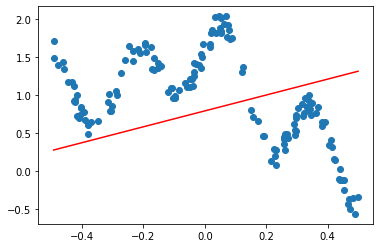

In [48]:
# Check init results:
# Making predictions
T_Pred = a*X*np.transpose(X) + b*X + c

plt.scatter(X, T) 
plt.plot([min(X), max(X)], [min(T_Pred), max(T_Pred)], color='red')  # regression line
plt.show()

# Report
Write your test results and utilized hyperparameter parameter values in this section. Briefly discuss how your algorithm works; and why it works as it is.